# A simple model of global cascades on random networks

**Recreating the model specified in:**
Watts, D. J. (2002). A simple model of global cascades on random networks. Proc. Natl. Acad. Sci. U.S.A., 99(9), 5766–5771. doi: 10.1073/pnas.082090499

In [573]:
import networkx as nx
import matplotlib
import random
import numpy as np
import matplotlib.pyplot as plt

In [574]:
def col_nodes_state(g):
    # create empty list for node colors
    node_color = []
    # for each node in the graph
    for node in g.nodes(data=True):
        # if the node has the attribute group1
        if node[1]["state"] == 1:
            node_color.append('blue')
        else:
            node_color.append('red')
    return node_color

def col_nodes_phi(g):
    # create empty list for node colors
    node_color = []
    # for each node in the graph
    for node in list(g.nodes):
        if G.nodes[node]["state"] != 1:
            # if the node has the attribute group1
            if len(g.adj[node]) == 0:
                node_color.append('red')
                continue
            if G.nodes[node]["phi"] < 1/len(g.adj[node]):
                node_color.append('green')
            else:
                node_color.append('red')
        else:
            node_color.append('blue')
    return node_color

## Model specifications
- Binary decision rule with externalities, agents are either in state 1 or 0
- Agent observes current states of $k$ other agents (neighbours)
- Agent adopts state 1 if fraction of neighbours $>= \phi$ (threshold)
- Thresholds and number of neighbors are heterogeneous
- Each agent is assigned a $\phi$ drawn from a distribution $f(\phi)$
- $f(\phi)$ with $x \in [0, 1]$ and $ \int_{1}^{0} f(\phi)d\phi = 1$
- Construct a network of $n$ agents, in which each agent is connected to $k$ neighbors with probability $p_k$ and the average number of neighbors is $〈k〉 = z$
- $〈k〉$ = expected value of k
- $p_k$ is degree distribution
- $z$ is average degree
- At $t=0$, $\Phi_0 << 1$ of agents switch to 1

In [575]:
G = nx.gnp_random_graph(50,0.15)
nx.set_node_attributes(G, 0, "state")

In [576]:
alpha = random.uniform(1,1)
beta = random.uniform(1,1)

In [577]:
node_ids = list(G.nodes)
for i in node_ids:
    k = len(G.adj[i])
    phi = np.random.beta(10, 1)
    attrs = {i: {"phi": 0.2}}
    nx.set_node_attributes(G, attrs)

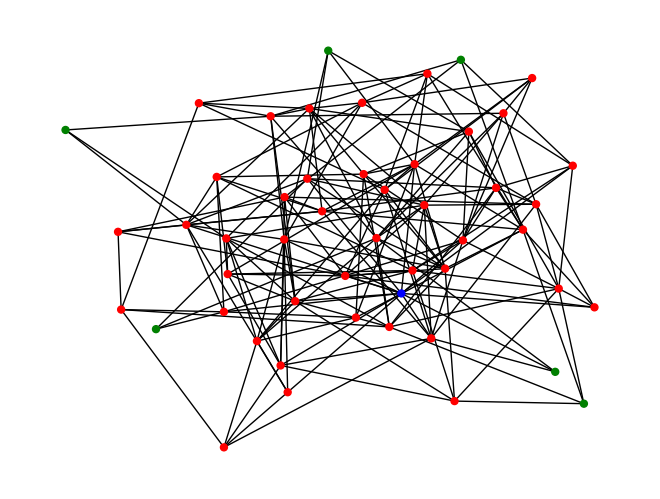

In [578]:
innovator = random.choice(node_ids)
attrs = {innovator: {"state": 1}}
nx.set_node_attributes(G, attrs)
nx.draw(G, with_labels=False, node_size=25, node_color=col_nodes_phi(G))

In [579]:
node_lst = list(G.nodes)
while True:
    if node_lst == []:
        break
    idx = random.randint(0, len(node_lst)-1)
    node = node_lst.pop(idx)
    if G.nodes[node]["state"] != 1:
        neighbours = G.adj[node]
        k = len(neighbours)
        phi = G.nodes[node]["phi"]
        count = sum([1 for neighbour in list(neighbours) if G.nodes[neighbour]["state"] == 1])
        try:
            if count/k >= phi:
                attrs = {node: {"state": 1}}
                nx.set_node_attributes(G, attrs)
        except ZeroDivisionError as e:
            pass

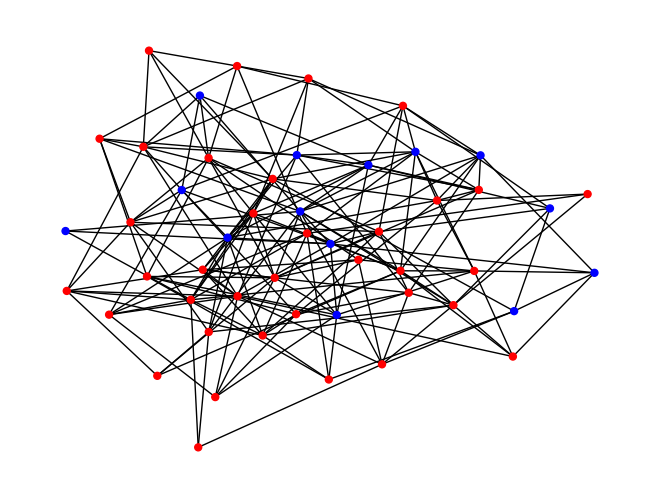

In [580]:
# draw graph with node attribute color
nx.draw(G, with_labels=False, node_size=25, node_color=col_nodes_state(G))